In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
from tensorflow.keras.datasets import mnist

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
x_train.shape

(60000, 28, 28)

### 一個 channel, 所以 (28,28) -->(28,28,1)

In [41]:
x_train.reshape(60000, 28, 28, 1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [42]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [43]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [44]:
x_train[87].shape

(28, 28, 1)

In [45]:
y_train[87]

9

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要的函式

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### step 1 打造函數學習機(CNN)

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [51]:
### 輸出 16 個 28*28 矩陣
### 事實上是 (28,28,16)

In [52]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### (14,14,16)

In [53]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [54]:
### output (14,14,32)

In [55]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [56]:
### output (7,7,32)

In [57]:
model.add(Conv2D(64,(3,3),padding='same',
                activation='relu'))

In [58]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [59]:
model.add(Flatten())

In [60]:
model.add(Dense(54, activation='relu'))  ##relu:最後有10個數字

In [61]:
model.add(Dense(10,activation='softmax'))  ##softmax:最後10個數字加起來是1

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [63]:
### 3*3(權重) + 1(bias)

(3*3+1)*16

160

In [64]:
(3*3*16+1)*32

4640

In [65]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),
             metrics=['accuracy'])

### step 2. fit

In [66]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 17s 289us/sample - loss: 0.0897 - acc: 0.1737
Epoch 2/12
60000/60000 [==============================] - 17s 291us/sample - loss: 0.0887 - acc: 0.3288
Epoch 3/12
60000/60000 [==============================] - 18s 299us/sample - loss: 0.0824 - acc: 0.3946
Epoch 4/12
60000/60000 [==============================] - 18s 297us/sample - loss: 0.0445 - acc: 0.7036
Epoch 5/12
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0201 - acc: 0.8710
Epoch 6/12
60000/60000 [==============================] - 18s 298us/sample - loss: 0.0139 - acc: 0.9103
Epoch 7/12
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0110 - acc: 0.9292
Epoch 8/12
60000/60000 [==============================] - 18s 299us/sample - loss: 0.0093 - acc: 0.9410
Epoch 9/12
60000/60000 [==============================] - 18s 298us/sample - loss: 0.0082 - acc: 0.9477
Epoch 10/12
60000/60000 [==============================] - 18s 2

### step 3. 預測

In [67]:
result = model.predict_classes(x_test)

In [68]:
def my_predict(n):
    print('我的 CNN 預測是', result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

我的 CNN 預測是 9


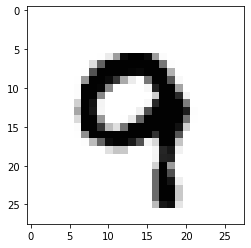

In [69]:
my_predict(99)

In [72]:
from ipywidgets import interact_manual

In [74]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [75]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 130us/sample - loss: 0.0056 - acc: 0.9637


In [76]:
loss, acc = score

In [77]:
print('測試資料正確率為', acc)

測試資料正確率為 0.9637


### 把我們的 model 存起來

In [78]:
model.save('myCNNmodel.h5')